# E-commerce Business Transaction Analytics
source : https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business

### About Dataset
#### Context
E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

#### Content
This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.<br>

The data set contains 500K rows and 8 columns. The following is the description of each column.

<strong>1. TransactionNo (categorical):</strong> a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.<br>
<strong>2. Date (numeric):</strong> the date when each transaction was generated.<br>
<strong>3. ProductNo (categorical):</strong> a five or six-digit unique character used to identify a specific product.<br>
<strong>4. Product (categorical):</strong> product/item name.<br>
<strong>5. Price (numeric):</strong> the price of each product per unit in pound sterling (£).<br>
<strong>6. Quantity (numeric):</strong> the quantity of each product per transaction. Negative values related to cancelled transactions.<br>
<strong>7. CustomerNo (categorical):</strong> a five-digit unique number that defines each customer.<br>
<strong>8. Country (categorical):</strong> name of the country where the customer resides.<br>

There is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once.<br>

#### Inspiration
Information is a main asset of businesses nowadays. The success of a business in a competitive environment depends on its ability to acquire, store, and utilize information. Data is one of the main sources of information. Therefore, data analysis is an important activity for acquiring new and useful information. Analyze this dataset and try to answer the following questions.<br>

1. How was the sales trend over the months?<br>
2. What are the most frequently purchased products?<br>
3. How many products does the customer purchase in each transaction?<br>
4. What are the most profitable segment customers?<br>
5. Based on your findings, what strategy could you recommend to the business to gain more profit?<br>


#### What more we can go for?

# Table Of Content <a id="0"></a>
* [Reading and Cleaning Data](#1)
* [Exploratory Analytics](#second-job)

In [2]:
import pandas as pd
import numpy as np
from Absolutely import mot
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

## Reading and Cleaning Data <a id="1"></a>
[back to Top](#0)

In [3]:
#data= pd.read_csv('/kaggle/input/an-online-shop-business/Sales Transaction v.4a.csv')
data= pd.read_csv('./Data/Sales Transaction v.4a.csv')
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [4]:
mot.data_report(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB
None


               Price       Quantity     CustomerNo
count  536350.000000  536350.000000  536295.000000
mean       12.662182       9.919347   15227.893178
std         8.490450     216.662300    1716.582932
min         5.130000  -80995.000000   12004.000000
25%        10.990000       1.000000   13807.000000
50%        11.940000       3.000000   15152.000000
75%        14

In [5]:
# Drop duplicates and null values
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.shape

(531095, 8)

In [6]:
# Converting Customer Number to integer
data.CustomerNo=data.CustomerNo.astype(int)
# Creating Amount Column
data['TransactionAmount']= data.Price*data.Quantity
# Casting data in the Date column into datetime type
data.Date=pd.to_datetime(data.Date)
# Creating Year Column
data['Year'] = data.Date.dt.year
# Creating Month Column
data['Month'] = data.Date.dt.month
# Creating Day Name Column
data["Day_name"] = data["Date"].dt.day_name()
# Sorting data based on the date
data=data.sort_values(by='Date',ascending=True).reset_index(drop=True)
data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TransactionAmount,Year,Month,Day_name
0,C536548,2018-12-01,22767,Triple Photo Frame Cornice,20.45,-2,12472,Germany,-40.90,2018,12,Saturday
1,536524,2018-12-01,21107,Cream Slice Flannel Pink Spot,13.27,6,17572,United Kingdom,79.62,2018,12,Saturday
2,536524,2018-12-01,21106,Cream Slice Flannel Chocolate Spot,13.27,6,17572,United Kingdom,79.62,2018,12,Saturday
3,536524,2018-12-01,21111,Swiss Roll Towel Chocolate Spots,13.27,6,17572,United Kingdom,79.62,2018,12,Saturday
4,536523,2018-12-01,22294,Heart Filigree Dove Small,11.53,24,12868,United Kingdom,276.72,2018,12,Saturday


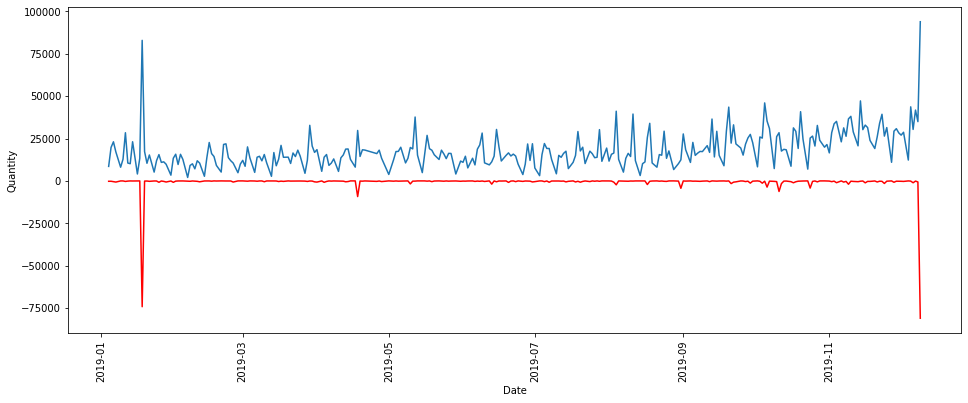

In [7]:
plt.figure(figsize=(16,6))
test_positive = data[(data['Date']>'2018-12-31')&(data['Quantity']>0)].groupby(['Date'],as_index=False)['Quantity'].sum()
test_negative = data[(data['Date']>'2018-12-31')&(data['Quantity']<0)].groupby(['Date'],as_index=False)['Quantity'].sum()

sns.lineplot(test_positive,x='Date',y='Quantity')
sns.lineplot(test_negative,x='Date',y='Quantity',color='red')
plt.xticks(rotation=90)
plt.show()

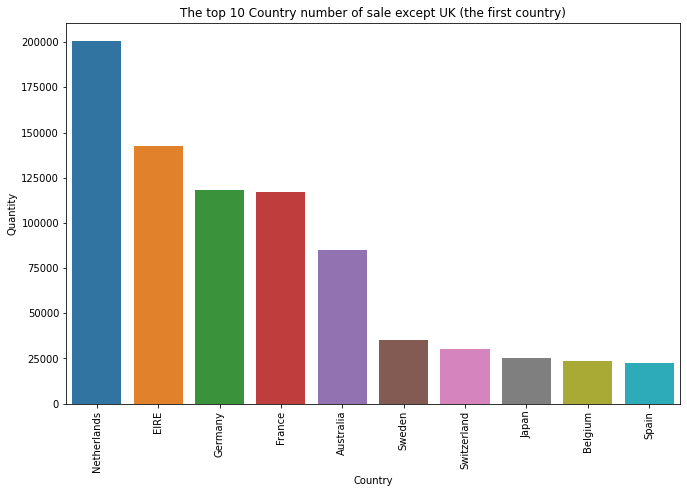

In [16]:
plt.figure(figsize=(11,7))
country = data.groupby(['Country'],as_index=False).agg({'Quantity':'sum','TransactionAmount':'sum'})\
    .sort_values(by='Quantity',ascending=False).head(11).tail(10)
sns.barplot(country,x='Country',y='Quantity')
plt.xticks(rotation=90)
plt.title('The top 10 Country number of sale except UK (the first country)')
plt.show()

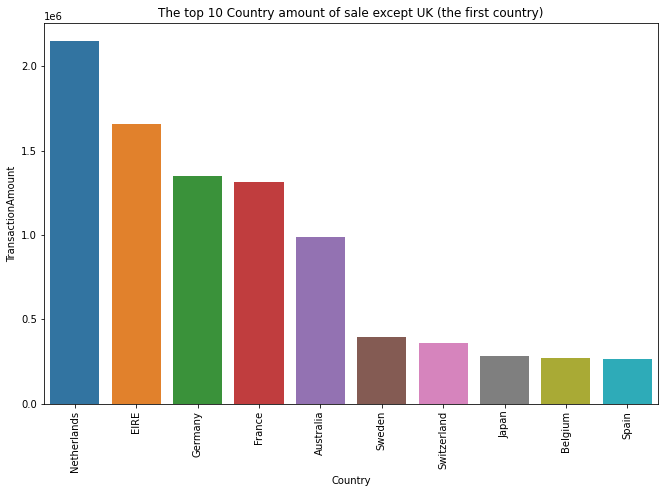

In [17]:
plt.figure(figsize=(11,7))
country = data.groupby(['Country'],as_index=False).agg({'Quantity':'sum','TransactionAmount':'sum'})\
    .sort_values(by='Quantity',ascending=False).head(11).tail(10)
sns.barplot(country,x='Country',y='TransactionAmount')
plt.xticks(rotation=90)
plt.title('The top 10 Country amount of sale except UK (the first country)')
plt.show()

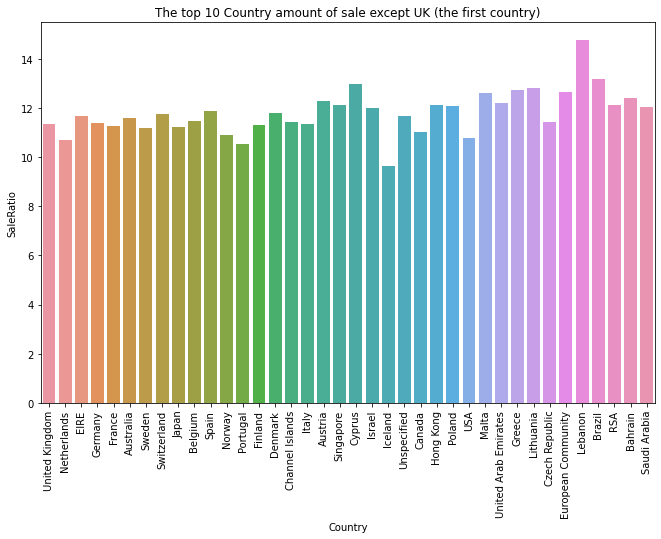

In [19]:
plt.figure(figsize=(11,7))
country = data.groupby(['Country'],as_index=False).agg({'Quantity':'sum','TransactionAmount':'sum'})\
    .sort_values(by='Quantity',ascending=False)
country['SaleRatio']= country['TransactionAmount']/country['Quantity']
sns.barplot(country,x='Country',y='SaleRatio')
plt.xticks(rotation=90)
plt.title('The top 10 Country amount of sale except UK (the first country)')
plt.show()

this ratio may help us know more about the customer spending habits or product availability<br>
Customer Spending Habits: A higher ratio typically indicates that customers in a particular country are spending more per transaction. This could imply that customers in that country have higher purchasing power or are more inclined to make larger purchases.

In [35]:
# Creating Agregate Table of Monthly Transaction 
Monthly_transaction = data[data.Quantity>0].groupby(['Year','Month'],as_index=False)\
    .agg(SellTransactionCount = ('TransactionNo','nunique'),
         SellUniqeProductCount = ('ProductNo','nunique'),
         SellAveragePrice = ('Price','mean'),
         SellProductCount = ('Quantity','sum'),
         SellCustomerCount = ('CustomerNo','nunique'),
         SellTransactionAmount = ('TransactionAmount','sum'),)

Monthly_transaction = pd.merge(Monthly_transaction,data[data.Quantity<0].groupby(['Year','Month'],as_index=False)\
    .agg(RefoundTransactionCount = ('TransactionNo','nunique'),
         RefoundUniqeProductCount = ('ProductNo','nunique'),
         RefoundAveragePrice = ('Price','mean'),
         RefoundProductCount = ('Quantity','sum'),
         RefoundCustomerCount = ('CustomerNo','nunique'),
         RefoundTransactionAmount = ('TransactionAmount','sum')),
         on=['Year','Month'],how='outer')
Monthly_transaction.RefoundProductCount = Monthly_transaction.RefoundProductCount*-1
Monthly_transaction.RefoundTransactionAmount = Monthly_transaction.RefoundTransactionAmount*-1

Monthly_transaction.head(13)

,Year,Month,SellTransactionCount,SellUniqeProductCount,SellAveragePrice,SellProductCount,SellCustomerCount,SellTransactionAmount,RefoundTransactionCount,RefoundUniqeProductCount,RefoundAveragePrice,RefoundProductCount,RefoundCustomerCount,RefoundTransactionAmount
0,2018,12,1552,2700,14.118853,357407,1026,4397648.39,297,413,16.500287,15822,246,180366.86
1,2019,1,1081,2507,13.572943,386332,827,4548423.47,242,428,16.154670,79715,198,909475.35
2,2019,2,1096,2330,13.679420,282587,846,3327342.64,188,283,16.352366,2571,167,35017.95
3,2019,3,1442,2433,13.606542,376809,1081,4384669.82,276,369,14.872270,3492,227,44634.22
4,2019,4,1235,2388,13.392246,307509,938,3579310.06,219,358,16.245863,13592,188,173307.89
5,2019,5,1670,2386,13.298061,394572,1159,4569952.21,264,371,15.135590,4049,215,47965.25
6,2019,6,1527,2559,13.239876,388535,1101,4486050.15,295,386,18.013700,6647,255,81752.19
7,2019,7,1452,2613,12.853741,398750,1057,4571494.88,232,452,14.630724,5816,195,69522.73
8,2019,8,1341,2533,12.898260,421286,997,4749801.23,236,403,16.783372,11655,195,140145.46
9,2019,9,1818,2673,12.960885,568844,1327,6613772.79,298,447,13.425332,6972,241,84345.44


In [9]:
product_data = data.groupby('ProductName')